# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

# import project1.solver as mysolver
# import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')

plt.style.use("tableau-colorblind10")
# plt.style.use("seaborn-v0_8-colorblind")
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = ":"

Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [2]:
# Define the y' function.
def func(t, y, k, m):
    f = np.zeros(len(y))
    f[0] = y[1]
    f[1] = -(k / m) * y[0]
    return f

# Prepare the input arguments.
A = 1
k = 1
m = 1
# omega_0 = np.sqrt(k / m)
dt = 0.01
t_0 = 0
t_f = 20
t_span = np.arange(t_0, t_f, dt)
t_eval = t_span
y_0 = np.array([1.0, 0.0])

# Use the IVP solver.
sol = mysolver.solve_ivp(func, t_span, y_0, "RK4", t_eval, k, m)  # https://stackoverflow.com/a/23744277

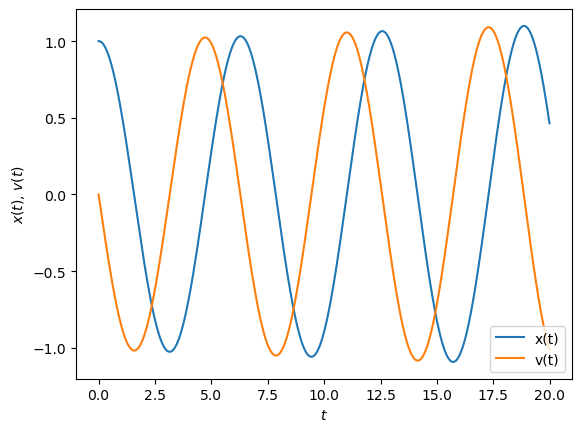

In [3]:
# Visualize the results.
fig, ax = plt.subplots()
ax.plot(t_span, sol[0], label=r"x(t)")
ax.plot(t_span, sol[1], label=r"v(t)")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$, $v(t)$")
ax.legend()

# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). Initial conditions: At $t = 0$, $K = M = 1$, $A = 1$, $\phi = 0$, $\lambda = 0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

In [4]:
# Define the y' function.
def func(t, y, k, m, lambda_):
    f = np.zeros(len(y))
    f[0] = y[1]
    f[1] = -(k / k) * y[0] - lambda_ * y[1]
    return f

# Prepare the input arguments.
A = 1
k = 1
m = 1
lambda_ = 0.2
# omega_0 = np.sqrt(k / m)
dt = 0.01
t_0 = 0
t_f = 20
t_span = np.arange(t_0, t_f, dt)
t_eval = t_span
y_0 = np.array([1.0, 0.0])

# Use the IVP solver.
sol = mysolver.solve_ivp(func, t_span, y_0, "RK4", t_eval, k, m, lambda_)

### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

In [5]:
# Compute the analytical solution
gamma = lambda_ / (2 * m)
omega_0 = np.sqrt(k / m)
omega = np.sqrt(omega_0**2 - gamma**2)
phi = 0
x_analytic = np.exp(-gamma * t_eval) * (np.cos(omega * t_eval + phi))

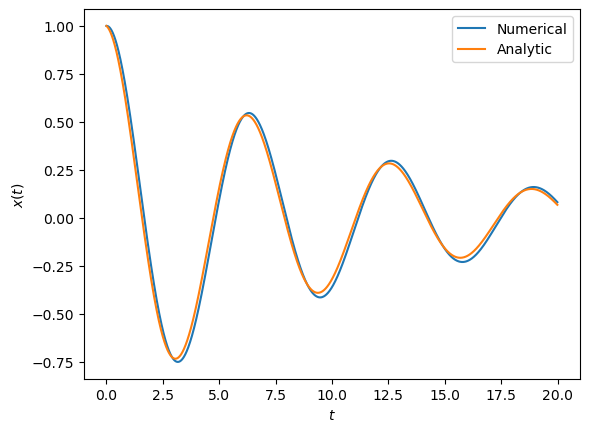

In [6]:
fig, ax = plt.subplots()
ax.plot(t_span, sol[0], label=r"Numerical")
ax.plot(t_span, x_analytic, label=r"Analytic")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()

## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

1.0
0.010000000000000002
True


Text(0.5, 1.0, 'Underdamping.')

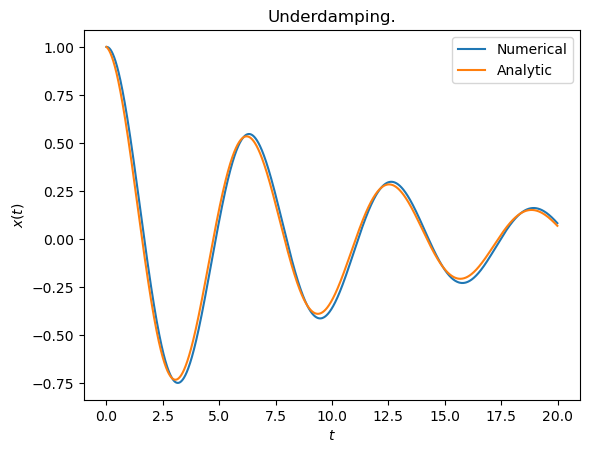

In [7]:
# Underdamping.
m = 1
k = 1
lambda_ = 0.2
gamma = lambda_ / (2 * m)
omega_0 = np.sqrt(k / m)
print(omega_0**2)
print(gamma**2)
print(omega_0**2 > gamma**2)
omega = np.sqrt(omega_0**2 - gamma**2)
sol = mysolver.solve_ivp(func, t_span, y_0, "RK4", t_eval, k, m, lambda_)
x_analytic = np.exp(-gamma * t_eval) * (np.cos(omega * t_eval + phi))
fig, ax = plt.subplots()
ax.plot(t_span, sol[0], label=r"Numerical")
ax.plot(t_span, x_analytic, label=r"Analytic")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()
ax.set_title("Underdamping.")

1.0
1.0
True


Text(0.5, 1.0, 'Critical damping.')

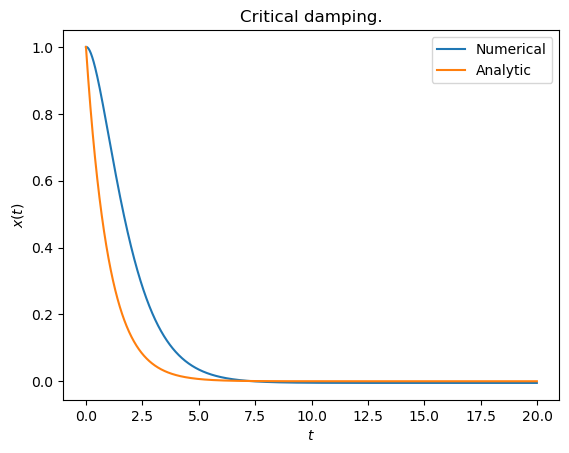

In [8]:
# Critical damping.
m = 1
k = 1
lambda_ = 2
gamma = lambda_ / (2 * m)
omega_0 = np.sqrt(k / m)
print(omega_0**2)
print(gamma**2)
print(omega_0**2 == gamma**2)
omega = np.sqrt(omega_0**2 - gamma**2)
sol = mysolver.solve_ivp(func, t_span, y_0, "RK4", t_eval, k, m, lambda_)
x_analytic = np.exp(-gamma * t_eval) * (np.cos(omega * t_eval + phi))
fig, ax = plt.subplots()
ax.plot(t_span, sol[0], label=r"Numerical")
ax.plot(t_span, x_analytic, label=r"Analytic")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()
ax.set_title("Critical damping.")

1.0
1.44
False


Text(0.5, 1.0, 'Overdamping.')

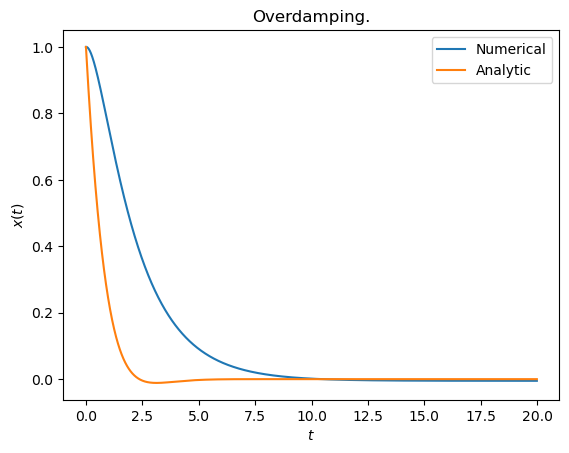

In [9]:
# Overdmping.
m = 1
k = 1
lambda_ = 2.4
gamma = lambda_ / (2 * m)
omega_0 = np.sqrt(k / m)
print(omega_0**2)
print(gamma**2)
print(omega_0**2 > gamma**2)
omega = np.sqrt(gamma**2 - omega_0**2)
sol = mysolver.solve_ivp(func, t_span, y_0, "RK4", t_eval, k, m, lambda_)
x_analytic = np.exp(-gamma * t_eval) * (np.cos(omega * t_eval + phi))
fig, ax = plt.subplots()
ax.plot(t_span, sol[0], label=r"Numerical")
ax.plot(t_span, x_analytic, label=r"Analytic")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()
ax.set_title("Overdamping.")

# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

Text(0.5, 1.0, 'Forced oscillation.')

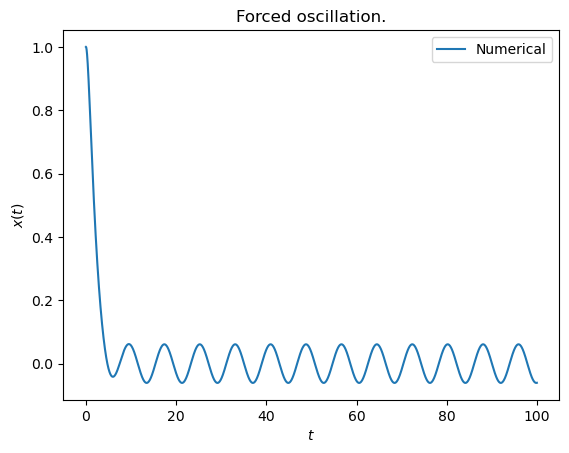

In [23]:
# https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/Book%3A_University_Physics_I_-_Mechanics_Sound_Oscillations_and_Waves_(OpenStax)/15%3A_Oscillations/15.07%3A_Forced_Oscillations
def func_forced(t, y, k, m, lambda_, F_0, omega_f):
    f = np.zeros(len(y))
    f[0] = y[1]
    f[1] = -(k / m) * y[0] - lambda_ * y[1] + F_0 * np.cos(omega_f * t)
    return f

# Prepare the input arguments.
dt = 0.01
t_0 = 0
t_f = 100
t_span = np.arange(t_0, t_f, dt)
t_eval = t_span

A = 1
y_0 = np.array([A, 0.0])
k = 1
m = 1
lambda_ = 2
F_0 = 0.1
omega_f = 0.8
args = (k, m, lambda_, F_0, omega_f)

# Use the IVP solver.
# FIXME: Figure out *args
# sol = mysolver.solve_ivp(
#     func_forced, t_span, y_0, "RK4", t_eval, k, m, lambda_, F_0, omega_f
# )
sol = solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, args)

# x_analytic = np.exp(-gamma * t_eval) * (np.cos(omega * t_eval + phi))

# Visualise.
fig, ax = plt.subplots()
ax.plot(t_span, sol[0], label=r"Numerical")
# ax.plot(t_span, x_analytic, label=r"Analytic")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()
ax.set_title("Forced oscillation.")

# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


Text(0.5, 1.0, 'Resonance.')

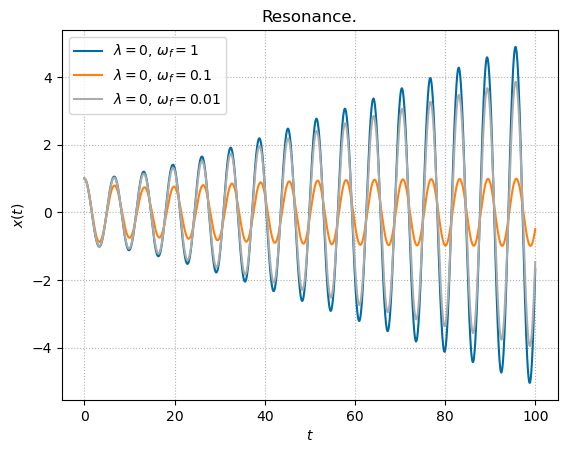

In [33]:
A = 1
y_0 = np.array([A, 0.0])
k = 1
m = 1
lambda_ = 0
F_0 = 0.1
omega_f = 1.0
args = (k, m, lambda_, F_0, omega_f)

# Use the IVP solver.
# FIXME: Figure out *args
# sol = mysolver.solve_ivp(
#     func_forced, t_span, y_0, "RK4", t_eval, k, m, lambda_, F_0, omega_f
# )
sol_1 = solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, args)
sol_2 = solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, (k, m, 0.1, F_0, omega_f))
sol_3 = solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, (k, m, 0.01, F_0, omega_f))

# x_analytic = np.exp(-gamma * t_eval) * (np.cos(omega * t_eval + phi))

# Visualise.
fig, ax = plt.subplots()
ax.plot(t_span, sol_1[0], label=r"$\lambda = 0$, $\omega_f = 1$")
ax.plot(t_span, sol_2[0], label=r"$\lambda = 0$, $\omega_f = 0.1$")
ax.plot(t_span, sol_3[0], label=r"$\lambda = 0$, $\omega_f = 0.01$")
# ax.plot(t_span, x_analytic, label=r"Analytic")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()
ax.set_title("Resonance.")

# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

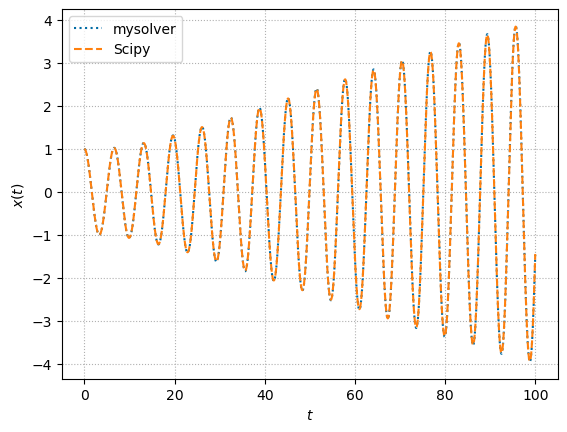

In [41]:
sol_mysolver = solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, (k, m, 0.01, F_0, omega_f))
sol_scipy = solver_scipy(func_forced, [t_0, t_f], y_0, args=(k, m, 0.01, F_0, omega_f), t_eval=t_eval, method='RK45')
fig, ax = plt.subplots()
ax.plot(t_span, sol_mysolver[0], ':', label="mysolver")
ax.plot(sol_scipy.t, sol_scipy.y[0], '--', label="Scipy")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$")
ax.legend()

# Performance

We could mesure the performance of our solver and compare it with scipy.

In [45]:
%timeit solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, (k, m, 0.01, F_0, omega_f))
# %timeit solver_scipy(func_forced, [t_0, t_f], y_0, args=(k, m, 0.01, F_0, omega_f), t_eval=t_eval, method='RK45')
import timeit
t = timeit.Timer(solver.solve_ivp(func_forced, t_span, y_0, "RK4", t_eval, (k, m, 0.01, F_0, omega_f)))
t.repeat()

t = timeit.Timer(solver_scipy(func_forced, [t_0, t_f], y_0, args=(k, m, 0.01, F_0, omega_f), t_eval=t_eval, method='RK45'))
t.repeat()


ValueError: stmt is neither a string nor callable

Which one is faster?